In [1]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 156s 1us/step


In [6]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


The label is  [6]


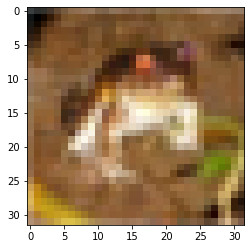

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
img = plt.imshow(x_train[0])
print('The label is ', y_train[0])

In [11]:
import keras
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [12]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.summary()

2021-10-18 00:54:57.831337: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-18 00:54:57.837131: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

In [15]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 160s 4ms/step - loss: 1.5393 - accuracy: 0.4388 - val_loss: 1.1604 - val_accuracy: 0.5819
Epoch 2/20
40000/40000 [==============================] - 118s 3ms/step - loss: 1.1234 - accuracy: 0.6004 - val_loss: 0.9269 - val_accuracy: 0.6779
Epoch 3/20
40000/40000 [==============================] - 100s 3ms/step - loss: 0.9604 - accuracy: 0.6606 - val_loss: 0.8666 - val_accuracy: 0.6840
Epoch 4/20
40000/40000 [==============================] - 103s 3ms/step - loss: 0.8657 - accuracy: 0.6958 - val_loss: 0.7836 - val_accuracy: 0.7277
Epoch 5/20
40000/40000 [==============================] - 103s 3ms/step - loss: 0.7859 - accuracy: 0.7241 - val_loss: 0.7346 - val_accuracy: 0.7454
Epoch 6/20
40000/40000 [==============================] - 106s 3ms/step - loss: 0.7302 - accuracy: 0.7414 - val_loss: 0.7240 - val_accuracy: 0.7449
Epoch 7/20
40000/40000 [==============================] - 101s

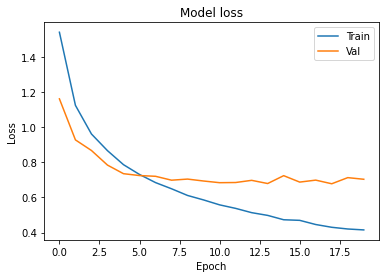

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

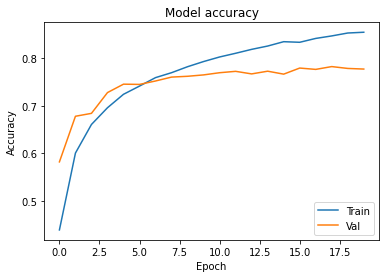

In [19]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [20]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 7s 722us/step


0.7728000283241272

In [21]:
model.save('my_cifar10_model.h5')